# Stokes class

Stokes is a class that manages Stokes vectors. It allows the user to create and manipulate them. The difference between Stokes and Jones formalisms is that Stokes vectors can handle partially polarized light, while Jones vectors can track the global phase of the electric field. However, Stokes objects store the global phase (if any) and use it when it is relevant.

## Creating an instance

An instance must be created before starting to operate with the Stokes vector. The initialization accepts one argument: the name of the vector. This name will be used for printing:

In [2]:
from py_pol.stokes import Stokes, create_Stokes, degrees
import numpy as np


S1 = Stokes("Source 1")
print(S1)

Source 1 is empty



Several Stokes objects can be created at the same time using the function *create_Stokes*.

In [7]:
S2, S3 = create_Stokes(name=('Source 2', 'Source 3'))
print(S2, S3)

list_of_S = create_Stokes(N=3)
print(list_of_S)

Source 2 is empty
 Source 3 is empty

[S is empty
, S is empty
, S is empty
]


## Generating polarization states

As shown in the previous example, the Stokes matrix is initialized with all elements equal to zero. There are many methods that can be used to generate a more desirable vector:

* **from_components**: Creates Stokes vectors directly from the 4 elements $S_0$, $S_1$, $S_2$, $S_3$.
* **from_matrix**: Creates Stokes vectors from an external 4 x shape numpy array.
* **from_list**: Creates a Jones_vector object directly from a list of 4 or 4x1 numpy arrays.
* **from_Jones**: Creates Stokes vectors from a Jones_vector object.
* **linear_light**: Creates Stokes vectors for pure linear polarizer light.
* **circular_light**: Creates Stokes vectors for pure circular polarizer light.
* **elliptical_light** Creates Stokes vectors for polarizer elliptical light.
* **general_charac_angles** Creates Stokes vectors given by their characteristic angles.
* **general_azimuth_ellipticity** Creates Stokes vectors given by their azimuth and ellipticity.


For a more detailed description of each method, refer to the individual documentation of each one.

Example: Light linearly polarized.

In [10]:
S1 = Stokes("Linear polarization")
S1.linear_light(azimuth=30*degrees)
print(S1)

Linear polarization @ 30.00 deg = 
[+1.000]   
[+0.500]   
[+0.866]   
[+0.000]   



The previous example only stores one Stokes vector. However, it is possible to store many Stokes vectors in the same object. This is useful specially when the same operation is performed upon all of them, as rotation. In this way, it is not required to use for loops, reducing significantly the computation time.

There are many ways of creating several Stokes vectors in the same object. The first way is creating an object with several identical vectors. This is performed using the *length* argument present in most creation methods:

In [12]:
S = Stokes("Source 1")
S.linear_light(azimuth = 45*degrees, intensity=2, length = 5)
print(S)

Source 1 = 
[+2.000]   [+2.000]   [+2.000]   [+2.000]   [+2.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   
[+2.000]   [+2.000]   [+2.000]   [+2.000]   [+2.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   



A second way of creating several vectors at the same time is using an array as one (or more) of the parameters of the creation methods. Take into account that, if you use this option, all parameters must have the same number of elements or just one element. Otherwise, the program will throw an exception.

In [13]:
S = Stokes("Source 1")
angles = np.linspace(0, 90*degrees, 5)
S.linear_light(azimuth = angles, intensity=2)
print(S)

Source 1 = 
[+2.000]   [+2.000]   [+2.000]   [+2.000]   [+2.000]   
[+2.000]   [+1.414]   [+0.000]   [-1.414]   [-2.000]   
[+0.000]   [+1.414]   [+2.000]   [+1.414]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   



If the parameters have dimension higher than 1, the program will store that information in order to make prints and plots. In that case, the *print* function separates the four components of the Stokes vectors:

$$S=\left[\begin{array}{c}
S_0\\
S_1\\
S_2\\
S_3\\
\end{array}\right]$$

In [14]:
S = Stokes("Source 1")
I = np.random.rand(3,3)
S.linear_light(azimuth = 30*degrees, intensity=I)
print(S)

Source 1 S0 = 
[[0.78909397 0.77521026 0.80856979]
 [0.00536159 0.45265541 0.38059019]
 [0.8828771  0.52652519 0.12394933]]
Source 1 S1 = 
[[0.39454699 0.38760513 0.40428489]
 [0.00268079 0.2263277  0.1902951 ]
 [0.44143855 0.26326259 0.06197467]]
Source 1 S2 = 
[[0.68337543 0.67135178 0.70024197]
 [0.00464327 0.39201108 0.32960078]
 [0.76459399 0.45598419 0.10734327]]
Source 1 S3 = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]



### Features of creation methods

Stokes formalism does not take into account the global phase of the light states. However, *Stokes* objects store it in the *global_phase* field. Use *None* if the global phase is unknown.

Most creation methods accept a *global_phase* argument that can be used to introduce it.

In [23]:
S = Stokes("Source 1")
S.linear_light(azimuth = 45*degrees, global_phase=90*degrees)
print(S.global_phase / degrees)

S.remove_global_phase()
print(S.global_phase)

[90.]
0


Many creation methods accept an *amplitude* or an *intensity* parameter ($a$ and $b$ for *elliptical_light*) in order to set the electric field amplitude (the norm of the electric field vector) or the intensity. If both of them are given together to the method, it will use the *amplitude*:

In [24]:
S = Stokes("Source 1")
S.linear_light(azimuth = 45*degrees, amplitude=5)
print(S)
_ = S.parameters.intensity(verbose=True)

S = Stokes("Source 2")
S.linear_light(azimuth = 45*degrees, intensity=2)
print(S)
_ = S.parameters.intensity(verbose=True)

S = Stokes("Source 3")
S.linear_light(azimuth = 45*degrees, intensity=2, amplitude=5)
print(S)
_ = S.parameters.intensity(verbose=True)

Source 1 @ 45.00 deg = 
[+25.000]   
[+0.000]   
[+25.000]   
[+0.000]   

The intensity of Source 1 @ 45.00 deg is (a.u.):
25.0

Source 2 @ 45.00 deg = 
[+2.000]   
[+0.000]   
[+2.000]   
[+0.000]   

The intensity of Source 2 @ 45.00 deg is (a.u.):
2.0

Source 3 @ 45.00 deg = 
[+25.000]   
[+0.000]   
[+25.000]   
[+0.000]   

The intensity of Source 3 @ 45.00 deg is (a.u.):
25.0



Also, most creation methods accept two parameters: *degree_pol* and *degree_depol*, which represent the degrees of polarization and depolarization respectively. This allows creating partially polarized light states using the same methods.

Both degrees are complementary, so if both of them are given to the method, only *degree_depol* is used.

In [27]:
S = Stokes("Source 1")
S.linear_light(azimuth = 45*degrees, intensity=5, degree_pol=0.8)
print(S)

S = Stokes("Source 2")
S.linear_light(azimuth = 45*degrees, intensity=5, degree_depol=0.8)
print(S)

S = Stokes("Source 3")
S.linear_light(azimuth = 45*degrees, intensity=5, degree_pol=0.8, degree_depol=0.8)
print(S)

Source 1 @ 45.00 deg = 
[+5.000]   
[+0.000]   
[+4.000]   
[+0.000]   

Source 2 @ 45.00 deg = 
[+5.000]   
[+0.000]   
[+3.000]   
[+0.000]   

Source 3 @ 45.00 deg = 
[+5.000]   
[+0.000]   
[+3.000]   
[+0.000]   



## Basic operations

Some physical phenomena that affects polarized light are described by simple operations performed to their Stokes vectors.

### Addition of two Stokes vectors

The interference of two light waves can be represented by the sum of their Stokes vectors. However, the global phase is important when two light states interfere, i.e., two vectors are added together. If both global phases are known (coherent sum), the polarized part of the Stokes vectors are transformed into Jones objects and added together. The result is tranformed back to a Stokes vector and the unpolarized parts are added.

In [29]:
S1 = Stokes("Source 1")
S1.linear_light(azimuth = 0*degrees, amplitude=1, global_phase=0)
print(S1)
S2 = Stokes("Source 2")
S2.linear_light(azimuth = 0*degrees, amplitude=1, global_phase=90*degrees)
print(S2)
S3 = S1 + S2
print(S3)

Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Source 2 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Source 1 + Source 2 = 
[+4.000]   
[+4.000]   
[+0.000]   
[+0.000]   



d:\codigo\py_pol\py_pol\jones_vector.py:1201: UserWarning: Non-pure Stokes vector transformed into a Jones vector
  'Non-pure Stokes vector transformed into a Jones vector')
d:\codigo\py_pol\py_pol\jones_vector.py:454: ComplexWarning: Casting complex values to real discards the imaginary part
  self.M = np.array(self.M, dtype=float)


If one or both phases are unknown (they have a *None* value), the Stokes vectors are added directly (incoherent sum).

In [30]:
S1 = Stokes("Source 1")
S1.linear_light(azimuth = 0*degrees, amplitude=1, global_phase=None)
print(S1)
S2 = Stokes("Source 2")
S2.linear_light(azimuth = 0*degrees, amplitude=1, global_phase=90*degrees)
print(S2)
S3 = S1 + S2
print(S3)

Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Source 2 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Source 1 + Source 2 = 
[+2.000]   
[+2.000]   
[+0.000]   
[+0.000]   



### Multiply by a constant

The absorption and gain experienced by a light wave is described by multiplying its Jones vector by a real positive number $c$. The light wave will experience absorption if $c<0$ and gain if $c>0$:

In [34]:
S1 = Stokes("Source 1")
S1.linear_light(azimuth = 0*degrees, amplitude = 0.5)
print(S1)

S2 = 2 * S1
print(S2)

S2 =  S1*3
print(S2)

S2 =  S1/3
print(S2)

Source 1 = 
[+0.250]   
[+0.250]   
[+0.000]   
[+0.000]   

2 * Source 1 = 
[+0.500]   
[+0.500]   
[+0.000]   
[+0.000]   

3 * Source 1 = 
[+0.750]   
[+0.750]   
[+0.000]   
[+0.000]   

Source 1 / 3 = 
[+0.083]   
[+0.083]   
[+0.000]   
[+0.000]   



If the constant is complex, the constant phase will be added to the global phase of the light, while its absolute value will increase or decrease the light intensity. 

Take into account that real negative values are a special case of complex numbers whose phase is 180º.

In [37]:
S1 = Stokes("Source 1")
S1.linear_light(azimuth = 0*degrees, intensity = 1)
print(S1)
_ = S1.parameters.global_phase(verbose=True)

c = 1j
S2 = c * S1
print(S2)
_ = S2.parameters.global_phase(verbose=True)

c = 0.5-0.5j
S2 = c * S1
print(S2)
_ = S2.parameters.global_phase(verbose=True)

Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

The global phase of Source 1 is (deg):
0.0

1j * Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

The global phase of 1j * Source 1 is (deg):
90.0

(0.5-0.5j) * Source 1 = 
[+0.707]   
[+0.707]   
[+0.000]   
[+0.000]   

The global phase of (0.5-0.5j) * Source 1 is (deg):
-45.0



### Equality

It is possible to compare two *Stokes* objects and tell if they are the same. It just compares the Stokes vectors and the global phase, not the rest of object fields.

In [3]:
S1 = Stokes("Source 1")
S1.linear_light(azimuth = 0*degrees)
print(S1)
S2 = Stokes("Source 2")
angles = np.linspace(0, 90*degrees, 5)
S2.linear_light(azimuth = angles)
print(S2)
print('Comparison: ', S1==S2, '\n\n')

S1 = Stokes("Source 1")
S1.linear_light(azimuth = 0*degrees, global_phase=0)
print(S1)
S2 = Stokes("Source 2")
S2.linear_light(azimuth = 0*degrees, global_phase=0.01)
print(S2)
print('Comparison: ', S1==S2)

Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Source 2 = 
[+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   
[+1.000]   [+0.707]   [+0.000]   [-0.707]   [-1.000]   
[+0.000]   [+0.707]   [+1.000]   [+0.707]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   

Source 1 - Source 2 = 
[+0.000]   [+0.152]   [+0.586]   [+1.235]   [+2.000]   
[+0.000]   [-0.141]   [-0.414]   [-0.472]   [-0.000]   
[+0.000]   [-0.058]   [-0.414]   [-1.141]   [-2.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   
 [0. 0. 0. 0. 0.]
Comparison:  [ True False False False False] 


Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Source 2 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Source 1 - Source 2 = 
[+0.000]   
[+0.000]   
[+0.000]   
[+0.000]   
 [0]
Comparison:  [False]


### Operations and multidimensionality

The basic operations of *Stokes* objects are subject to the same casting rules as numpy arrays. This means that they can be easily used even if one or both elements of the operation have more than one element.

Here are some examples:

In [59]:
# Sum
S1 = Stokes("Source 1")
S1.linear_light(azimuth = 0*degrees, amplitude=1)
print(S1)
S2 = Stokes("Source 2")
angles = np.linspace(0, 90*degrees, 5)
S2.linear_light(azimuth = angles, amplitude=1, global_phase = 45*degrees)
print(E2)

S3 = S1 + S2
print(S3)

Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

(0.5-0.5j) * Source 1 = 
[+0.707]   
[+0.707]   
[+0.000]   
[+0.000]   

Source 1 + Source 2 = 
[+3.414]   [+3.307]   [+3.000]   [+2.541]   [+2.000]   
[+3.414]   [+3.014]   [+2.000]   [+0.834]   [+0.000]   
[+0.000]   [+1.248]   [+2.000]   [+2.014]   [+1.414]   
[+0.000]   [+0.541]   [+1.000]   [+1.307]   [+1.414]   



In [60]:
# Multply by a constant
S1 = Stokes("Source 1")
S1.linear_light(azimuth = 30*degrees, amplitude = 1)
print(S1)

c = np.linspace(0.1, 2.3, 5)
S2 = c * S1
print(S2)

Source 1 @ 30.00 deg = 
[+1.000]   
[+0.500]   
[+0.866]   
[+0.000]   

Source 1 @ 30.00 deg = 
[+0.100]   [+0.650]   [+1.200]   [+1.750]   [+2.300]   
[+0.050]   [+0.325]   [+0.600]   [+0.875]   [+1.150]   
[+0.087]   [+0.563]   [+1.039]   [+1.516]   [+1.992]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   



## Stokes vectors manipulation

There are several operations that can be applied to a Stokes vector.


* **get**:  Gets a matrix with the electric field components.
* **clear**:  Removes data and name form Stokes vectors.
* **copy**:  Creates a copy of the Jones_vector object.
* **stretch**:  Stretches a Stokes vectors of size 1.
* **shape_like**:  Takes the shape of another object to use as its own.
* **simplify**:  Simplifies the Stokes vectors in several ways.
* **rotate**: Rotates the Stokes vectors.
* **sum**: Calculates the summatory of the Stokes vectors in the object.
* **flip**: Flips the object along some dimensions.
* **reciprocal**: Calculates the Stokes vectors that propagates backwards.
* **orthogonal**: Calculates the orthogonal Stokes vectors.
* **normalize**: Normalize the electric field to be normalized in electric field amplitude or intensity.
* **rotate_to_azimuth**: Rotates the Stokes vectors to have a certain azimuth.
* **remove_global_phase**: Calculates the global phase of the electric field (respect to the X component) and removes it.
* **add_global_phase**: Adds a global phase to the Stokes vectors.
* **set_global_phase**: Sets the global phase of the Stokes vectors.
* **set_depolarization**: Sets the degree of depolarization.
* **add_depolarization**: Increases the degree of depolarization.
* **draw_ellipse**:  Draws the polarization ellipse of the Stokes vectors.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [61]:
S1 = Stokes('Source 1')
S1.linear_light(azimuth=0*degrees)
print(S1)

S1.rotate(angle=45*degrees)
print(S1)

Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Source 1 @ 45.00 deg = 
[+1.000]   
[+0.000]   
[+1.000]   
[+0.000]   



Most manipulation methods have the *keep* argument that specifies if the originial object must be preserved or transformed. If *keep* is *True* (default is *False*), a new object is created:

In [62]:
S1 = Stokes('Source 1')
S1.linear_light(azimuth=0*degrees)

S2 = S1.rotate(angle=45*degrees, keep=True)
S2.name = 'Source 2'
print(S1, S2)

S2 = S1.rotate(angle=45*degrees, keep=False)
S2.name = 'Source 2'
print(S1, S2)

Source 1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   
 Source 2 = 
[+1.000]   
[+0.000]   
[+1.000]   
[+0.000]   

Source 2 = 
[+1.000]   
[+0.000]   
[+1.000]   
[+0.000]   
 Source 2 = 
[+1.000]   
[+0.000]   
[+1.000]   
[+0.000]   



*Stokes* objects allow taking elements and changing them through indices like a *numpy.ndarray*.

Examples:

In [63]:
M = np.random.rand(4, 3, 5)
S1 = Stokes('Original')
S1.from_matrix(M)
print(S1)

S2 = S1[0:3]
print(S2)

Original S0 = 
[[0.59530271 0.17319846 0.55714191 0.18659247 0.04680568]
 [0.01256454 0.75467426 0.86669819 0.42953192 0.0673898 ]
 [0.60421673 0.14588876 0.52971088 0.69828334 0.87542717]]
Original S1 = 
[[0.07082795 0.40458816 0.00406076 0.33722341 0.56133002]
 [0.35427773 0.32376848 0.58125322 0.91512961 0.70480721]
 [0.13040209 0.32285786 0.13019929 0.83091635 0.54895833]]
Original S2 = 
[[0.70727841 0.1707769  0.71916438 0.15479135 0.98763534]
 [0.51879584 0.43941956 0.72104226 0.82847499 0.55679161]
 [0.69573059 0.29127961 0.51033263 0.33243148 0.0088345 ]]
Original S3 = 
[[0.79386136 0.74534528 0.19717868 0.30582679 0.36740567]
 [0.68066747 0.49568026 0.58920156 0.00395603 0.26614934]
 [0.04927714 0.00419555 0.42527159 0.33362667 0.62918284]]

Original_picked = 
[+0.595]   [+0.173]   [+0.557]   
[+0.071]   [+0.405]   [+0.004]   
[+0.707]   [+0.171]   [+0.719]   
[+0.794]   [+0.745]   [+0.197]   



In [65]:
S3.linear_light()
S4 = S1.copy()
S4.name = 'Cambiado'
S4[0:3,0:2] = S3
print(S4)

Cambiado S0 = 
[[1.         1.         0.55714191 0.18659247 0.04680568]
 [1.         1.         0.86669819 0.42953192 0.0673898 ]
 [1.         1.         0.52971088 0.69828334 0.87542717]]
Cambiado S1 = 
[[1.         1.         0.00406076 0.33722341 0.56133002]
 [1.         1.         0.58125322 0.91512961 0.70480721]
 [1.         1.         0.13019929 0.83091635 0.54895833]]
Cambiado S2 = 
[[0.         0.         0.71916438 0.15479135 0.98763534]
 [0.         0.         0.72104226 0.82847499 0.55679161]
 [0.         0.         0.51033263 0.33243148 0.0088345 ]]
Cambiado S3 = 
[[0.         0.         0.19717868 0.30582679 0.36740567]
 [0.         0.         0.58920156 0.00395603 0.26614934]
 [0.         0.         0.42527159 0.33362667 0.62918284]]



# Parameters of Stokes vector

Several parameters can be measured from a Stokes vector. They are implemented in the independent class Parameters_Stokes_vector, which is stored in the parameters field of Stokes class.

* **components**: Calculates the electric field components of the Stokes vectors.
* **amplitudes**: Calculates the electric field amplitudes of the Stokes vectors.
* **intensity**: Calculates the intensity of the Stokes vectors.
* **irradiance**: Calculates the irradiance of the Stokes vectors.
* **alpha**: Calculates the ratio between electric field amplitudes ($E_x$/$E_y$).
* **delay / delta**: Calculates the delay (phase shift) between Ex and Ey components of the electric field.
* **charac_angles**: Calculates both alpha and delay, the characteristic angles of the Stokes vectors.
* **azimuth**: Calculates azimuth, that is, the orientation angle of the major axis.
* **ellipticity_angle**: Calculates the ellipticity angle.
* **azimuth_ellipticity**: Calculates both azimuth and ellipticity angles.
* **ellipse_axes**: Calculates the length of major and minor axis (a,b).
* **ellipticity_param**: Calculates the ellipticity parameter, b/a.
* **eccentricity**: Calculates the eccentricity, the complementary of the ellipticity parameter.
* **global_phase**: Calculates the global phase of the Stokes vectors (respect to the X component of the electric field).
* **degree_polarization**: Calculates the degree of polarization of the Stokes vectors.
* **degree_depolarization**: Calculates the degree of depolarization of the Stokes vectors.
* **degree_linear_polarization**: Calculates the degree of linear polarization of the Stokes vectors.
* **degree_circular_polarization**: Calculates the degree of circular polarization of the Stokes vectors.
* **norm**: Calculates the norm of the Stokes vectors.
* **polarized_unpolarized**: Divides the Stokes vector in Sp+Su, where Sp is fully-polarized and Su fully-unpolarized.

* **get_all**: Returns a dictionary with all the parameters of Stokes vectors.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [66]:
S = Stokes("Source 1")
S.linear_light(azimuth = 45*degrees)
I0 = S.parameters.intensity()
print(I0)

1.0


When several Stokes vectors are stored in the object, setting *verbose* argument to *True* makes the method print the values in screen. Also, 1D or 2D figures can be shown if the *draw* argument is set to *True*:

The azimuth of Source 1 is (deg):
[  0.          16.36363636  32.72727273  49.09090909  65.45454545
  81.81818182  98.18181818 114.54545455 130.90909091 147.27272727
 163.63636364   0.        ]
The mean value is 75.0 +- 54.46016058467962



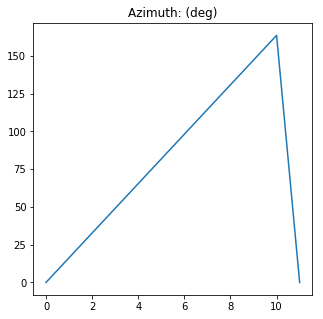

In [67]:
az = np.linspace(0, 180*degrees, 12)
S = Stokes("Source 1")
S.general_azimuth_ellipticity(azimuth=az)
az = S.parameters.azimuth(draw=True, verbose=True)

The azimuth of Source 1 is (deg):
The mean value is 87.20947265625 +- 53.089012724898296

The ellipticity angle of Source 1 is (deg):
The mean value is 1.7763568394002505e-15 +- 26.184535918359188



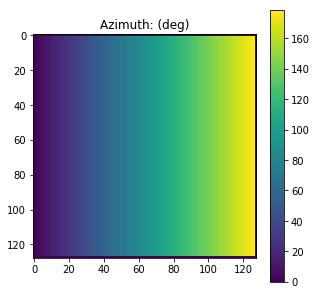

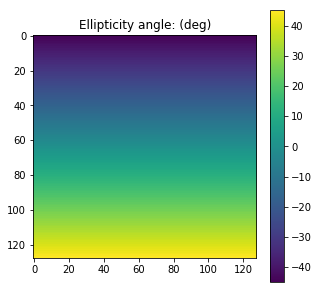

In [116]:
az = np.linspace(0, 180*degrees, 128)
el = np.linspace(-45*degrees, 45*degrees, 128)
AZ, EL = np.meshgrid(az, el)

S = Stokes("Source 1")
S.general_azimuth_ellipticity(azimuth=AZ, ellipticity=EL)
AZ, EL = S.parameters.azimuth_ellipticity(draw=True, use_nan=False)

There is a method in *Parameters_Stokes* class, *get_all* that computes all the parameters available and stores in a dictionary *.dict_params()*. Using the *print* function upon the *Parameters_Stokes* class invokes the method *get_all*.

Example:

In [120]:
S1 = Stokes("Source 1")
S1. general_charac_angles(alpha=25*degrees,  delay=90*degrees,  intensity=1,    degree_pol=0.75)
print(S1,'\n')
      
print(S1.parameters)

Source 1 = 
[+1.000]   
[+0.482]   
[+0.000]   
[+0.575]   
 

The intensity of Source 1 is (a.u.):
1.0
Low dimensionality, figure not available.

The elctric field amplitudes of Source 1 are (V/m):
  Ex (V/m)
0.6797308402774875
  Ey (V/m)
0.31696369630552457
  Eu (V/m)
0.4999999999999999
Low dimensionality, figure not available.

The global phase of Source 1 is (deg):
0.0
Low dimensionality, figure not available.

The degree of depolarization of Source 1 is:
0.6614378277661475
Low dimensionality, figure not available.

The degree of polarization of Source 1 is:
0.7500000000000001
Low dimensionality, figure not available.

The degree of linear polarization of Source 1 is:
0.48209070726490455
Low dimensionality, figure not available.

The degree of circular polarization of Source 1 is:
0.5745333323392335
Low dimensionality, figure not available.

The alpha of Source 1 is (deg):
24.999999999999996
Low dimensionality, figure not available.

The delay of Source 1 is (deg):
90.0
Low dimensi

# Checks of Stokes vectors

There are several checks that can be performed upon a Stokes vector. They are implemented in the independent class *Checks_Stokes*, which is stored in the *checks* field of *Stokes* class.

* **is_physical**: Checks if the Stokes vectors are physically realizable.
* **is_linear**: Checks if the Stokes vectors are lienarly polarized.
* **is_circular**: Checks if the Stokes vectors are circularly polarized.
* **is_right_handed**: Checks if the Stokes vectors rotation direction are right handed.
* **is_left_handed**: Checks if the Stokes vectors rotation direction are left handed.
* **is_polarized**: Checks if the Stokes vectors are at least partially polarized.
* **is_totally_polarized**: Checks if the Stokes vectors are totally polarized.
* **is_depolarized**: Checks if the Stokes vectors are at least partially depolarized.
* **is_totally_depolarized**: Checks if the Stokes vectors are totally depolarized.

* **get_all**: Returns a dictionary with all the checks of Stokes vectors.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [124]:
S = Stokes("Source 1")
S.linear_light(azimuth = 45*degrees)
cond = S.checks.is_linear()
print(cond)

1.0


1D and 2D plot draws are also implemented for this class:

Source 1 is right handed:
[[False False False ... False False False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
The mean value is 0.4921875 +- 0.4999389611180049



d:\codigo\py_pol\py_pol\stokes.py:2032: RuntimeWarning: invalid value encountered in sqrt
  # Print the result if required
d:\codigo\py_pol\py_pol\stokes.py:3291: RuntimeWarning: invalid value encountered in greater
  return cond


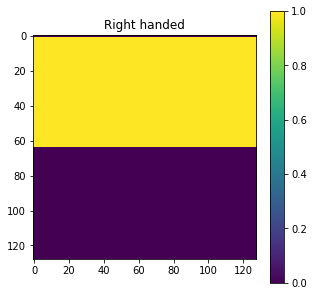

In [143]:
alpha = np.linspace(30*degrees, 30*degrees, 128)
delay = np.linspace(0, 360*degrees, 128)
Alpha, Delay = np.meshgrid(alpha, delay)

S = Stokes("Source 1")
S.general_charac_angles(alpha=Alpha, delay=Delay)
_ = S.checks.is_right_handed(verbose=True, draw=True, use_nan=False)

# Analysis of Stokes vectors

There there is one analysis that can be performed upon a Stokes vector. It is implemented in the independent class *Analysis_Stokes*, which is stored in the *analysis* field of *Stokes* class.

* **filter_physical_conditions**: Forces the Stokes vectors to be physically realizable.

For a more detailed description, refer to its documentation.

Example:

In [145]:
S1 = Stokes("Source 1")
M = np.random.rand(4,6) * 2 - 1
S1.from_matrix(M)
print(S1)

S2 = S1.analysis.filter_physical_conditions(keep=True)
S2.name = 'Corrected source'
print(S2)

Source 1 = 
[+0.367]   [-0.933]   [+0.036]   [+0.259]   [+0.959]   [+0.260]   
[-0.118]   [+0.042]   [-0.172]   [-0.772]   [+0.072]   [-0.700]   
[+0.240]   [+0.902]   [+0.241]   [-0.236]   [+0.555]   [-0.101]   
[+0.015]   [-0.715]   [-0.995]   [+0.956]   [-0.105]   [+0.642]   

Corrected source = 
[+0.367]   [+0.933]   [+0.036]   [+0.259]   [+0.959]   [+0.260]   
[-0.118]   [+0.034]   [-0.006]   [-0.160]   [+0.072]   [-0.191]   
[+0.240]   [+0.730]   [+0.008]   [-0.049]   [+0.555]   [-0.028]   
[+0.015]   [-0.579]   [-0.035]   [+0.198]   [-0.105]   [+0.175]   

